In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.transform import resize 
from skimage.io import imread
from random import random , choice
from glob import glob
from PIL import Image
import tensorflow as tf

In [2]:
def load_data(dataset_name , img_res = (128 , 128) , batch_size = 1 , is_validation=False):
    data_type = "valid" if is_validation else "train"
    dataset_path = os.path.join('datasets' , dataset_name , data_type)
    path = glob(os.path.join(dataset_path , '*'))
    
    batch_images = np.random.choice(path , size = batch_size)
    
    imgs_hr = []
    imgs_lr = []
    
    for img_path in batch_images :
        img = load_image(img_path)
        h , w = img_res
        low_h , low_w = int(h/4) , int(w/4)
        
        img_hr = resize(img , img_res)
        img_lr = resize(img , (low_h , low_w))
        
        if not is_validation and random() <0.5:
            
            img_hr = np.fliplr(img_hr)
            img_lr = np.fliplr(img_lr)
            
        imgs_hr.append(img_hr)
        imgs_lr.append(img_lr)
     
    imgs_hr = np.array(imgs_hr)/255. - 0.5
    imgs_lr = np.array(imgs_lr)/255. - 0.5
    return imgs_hr , imgs_lr

def load_image(path):
    return imread(path , plugin = 'pil').astype(np.float)
        


In [3]:
dataset_name = 'div2k'
img_res = (128, 128)
batch_size = 16
is_validation = False

train_imgs_hr, train_imgs_lr = load_data(dataset_name, img_res, batch_size, is_validation)

# Usage for validation data
valid_dataset_name = 'div2k'
valid_imgs_hr, valid_imgs_lr = load_data(valid_dataset_name, img_res, batch_size, is_validation=True)


C:\Users\Piyush\AppData\Local\Temp\ipykernel_1444\4083636033.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return imread(path , plugin = 'pil').astype(np.float)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


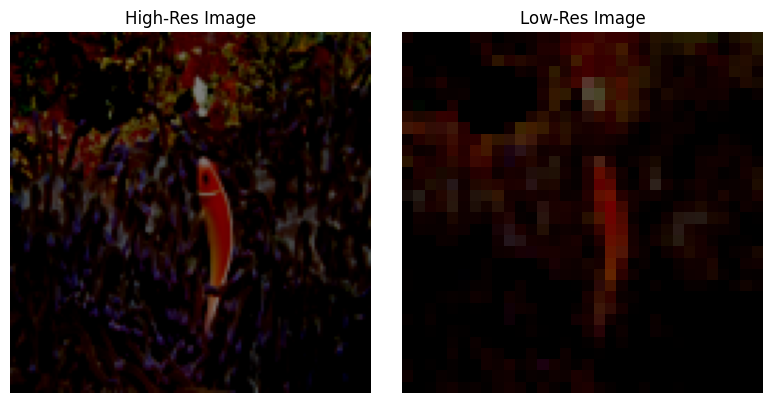

In [6]:
# Display the high-resolution image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(train_imgs_hr[11])  # De-normalize and display
plt.title('High-Res Image')
plt.axis('off')

# Display the low-resolution image
plt.subplot(1, 2, 2)
plt.imshow(train_imgs_lr[11]) 
plt.title('Low-Res Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print("High-Res Image Shape:", train_imgs_hr.shape)
print("Low-Res Image Shape:", train_imgs_lr.shape)


In [ ]:
print("Min HR Value:", np.min(train_imgs_hr[11]))
print("Max HR Value:", np.max(train_imgs_hr[11]))


In [7]:
from __future__ import print_function, division
import scipy

In [8]:
from keras.datasets import mnist